### Adaptive time steps (variable time resolution) for reaction `A <-> B`,
with 1st-order kinetics in both directions, taken to equilibrium

Same as the experiment _"react_1"_ , but with adaptive variable time steps

LAST REVISED: Mar. 11, 2023

In [1]:
# Extend the sys.path variable, to contain the project's root directory
import set_path
set_path.add_ancestor_dir_to_syspath(2)  # The number of levels to go up 
                                         # to reach the project's home, from the folder containing this notebook

Added 'D:\Docs\- MY CODE\BioSimulations\life123-Win7' to sys.path


In [2]:
from experiments.get_notebook_info import get_notebook_basename

from src.modules.reactions.reaction_data import ReactionData as chem
from src.modules.reactions.reaction_dynamics import ReactionDynamics

import numpy as np
import plotly.express as px
from src.modules.visualization.graphic_log import GraphicLog

In [3]:
# Initialize the HTML logging (for the graphics)
log_file = get_notebook_basename() + ".log.htm"    # Use the notebook base filename for the log file

# Set up the use of some specified graphic (Vue) components
GraphicLog.config(filename=log_file,
                  components=["vue_cytoscape_1"],
                  extra_js="https://cdnjs.cloudflare.com/ajax/libs/cytoscape/3.21.2/cytoscape.umd.js")

-> Output will be LOGGED into the file 'react_2.log.htm'


# Initialize the System
Specify the chemicals and the reactions

In [4]:
# Specify the chemicals
chem_data = chem(names=["A", "B"])

# Reaction A <-> B , with 1st-order kinetics in both directions
chem_data.add_reaction(reactants=["A"], products=["B"], 
                       forward_rate=3., reverse_rate=2.)

print("Number of reactions: ", chem_data.number_of_reactions())

Number of reactions:  1


In [5]:
chem_data.describe_reactions()

Number of reactions: 1 (at temp. 25 C)
0: A <-> B  (kF = 3 / kR = 2 / Delta_G = -1,005.13 / K = 1.5) | 1st order in all reactants & products


In [6]:
# Send a plot of the network of reactions to the HTML log file
graph_data = chem_data.prepare_graph_network()
GraphicLog.export_plot(graph_data, "vue_cytoscape_1")

[GRAPHIC ELEMENT SENT TO LOG FILE `react_2.log.htm`]


# Start the simulation

In [7]:
dynamics = ReactionDynamics(reaction_data=chem_data)

In [8]:
# Initial concentrations of all the chemicals, in index order
dynamics.set_conc([10., 50.])

dynamics.describe_state()

SYSTEM STATE at Time t = 0:
2 species:
  Species 0 (A). Conc: 10.0
  Species 1 (B). Conc: 50.0


In [9]:
dynamics.history.get()

,SYSTEM TIME,A,B,caption
0,0.0,10.0,50.0,Initial state


## Run the reaction

In [10]:
dynamics.set_diagnostics()       # To save diagnostic information about the call to single_compartment_react()

dynamics.single_compartment_react(initial_step=0.1, target_end_time=1.2,
                                  variable_steps=True, thresholds={"low": 0.5, "high": 0.8},
                                  snapshots={"initial_caption": "1st reaction step",
                                             "final_caption": "last reaction step"},
                                  )
# Note: we are accepting the default variable_steps_threshold_abort = 1.44 and abort_step_reduction_factor = 2.

INFO: The current time step (0.1) leads to an 'adjusted L2 rate' (24.5) > HIGH threshold (1.44):
      -> will backtrack, and re-do step with a SMALLER delta time of 0.05 [Step started at t=0, and will rewind there]
INFO: The current time step (0.05) leads to an 'adjusted L2 rate' (6.125) > HIGH threshold (1.44):
      -> will backtrack, and re-do step with a SMALLER delta time of 0.025 [Step started at t=0, and will rewind there]
INFO: The current time step (0.025) leads to an 'adjusted L2 rate' (1.531) > HIGH threshold (1.44):
      -> will backtrack, and re-do step with a SMALLER delta time of 0.0125 [Step started at t=0, and will rewind there]
Some steps were backtracked and re-done, to prevent negative concentrations or excessively large concentration changes
16 total step(s) taken


## The flag _variable_steps_ automatically adjusts up or down the time step,  whenever the changes of concentrations are, respectively, "slow" or "fast" (as determined using the specified _thresholds_ )

In [11]:
df = dynamics.get_history()   # The system's history, saved during the run of single_compartment_react()
df

,SYSTEM TIME,A,B,caption
0,0.0000,10.000000,50.000000,Initial state
1,0.0125,10.875000,49.125000,1st reaction step
2,0.0375,12.515625,47.484375,
3,0.0500,13.233398,46.766602,
4,0.0750,14.579224,45.420776,
5,0.0875,15.168022,44.831978,
6,0.1125,16.272019,43.727981,
7,0.1375,17.238017,42.761983,
8,0.1875,18.928513,41.071487,
9,0.2125,19.562449,40.437551,


In [12]:
dynamics.explain_time_advance()

From time 0 to 0.0125, in 1 reduced step of 0.0125 (1/8 of requested step)
From time 0.0125 to 0.0375, in 1 FULL step of 0.025
From time 0.0375 to 0.05, in 1 FULL step of 0.0125
From time 0.05 to 0.075, in 1 FULL step of 0.025
From time 0.075 to 0.0875, in 1 FULL step of 0.0125
From time 0.0875 to 0.1375, in 2 FULL steps of 0.025
From time 0.1375 to 0.1875, in 1 FULL step of 0.05
From time 0.1875 to 0.2125, in 1 FULL step of 0.025
From time 0.2125 to 0.3125, in 2 FULL steps of 0.05
From time 0.3125 to 0.5125, in 2 FULL steps of 0.1
From time 0.5125 to 0.7125, in 1 FULL step of 0.2
From time 0.7125 to 1.112, in 1 FULL step of 0.4
From time 1.112 to 1.912, in 1 FULL step of 0.8


## Notice how the reaction proceeds in smaller steps in the early times, when [A] and [B] are changing much more rapidly
### That resulted from passing the flag _variable_steps_ to single_compartment_react()

## Detailed Example 1: **going from 0.1375 to 0.1875**    

In [116]:
lookup = pd.merge_asof(pd.DataFrame({'lookup':[0.1375, 0.1875]}), df,
              right_on='SYSTEM TIME', left_on='lookup',
              direction='nearest')
lookup

,lookup,SYSTEM TIME,A,B,caption
0,0.1375,0.1375,17.238017,42.761983,
1,0.1875,0.1875,18.928513,41.071487,


In [117]:
delta_concentrations = (lookup.iloc[1][['A', 'B']] - 
                        lookup.iloc[0][['A', 'B']]).to_numpy()
delta_concentrations

array([1.6904957592487335, -1.6904957592487335], dtype=object)

As expected by the 1:1 stoichiometry, delta_A = - delta_B

The above values coud also be looked up from the diagnostic data, since we only have 1 reaction:

In [124]:
rxn_data = dynamics.get_diagnostic_rxn_data(rxn_index=0)

Reaction:  A <-> B


In [129]:
rxn_data[0:12]

,TIME,Delta A,Delta B,reaction,delta_time,caption
0,0.0000,7.000000,-7.000000,0,0.1000,
1,0.0000,3.500000,-3.500000,0,0.0500,
2,0.0000,1.750000,-1.750000,0,0.0250,
3,0.0000,0.875000,-0.875000,0,0.0125,
4,0.0125,1.640625,-1.640625,0,0.0250,
5,0.0375,0.717773,-0.717773,0,0.0125,
6,0.0500,1.345825,-1.345825,0,0.0250,
7,0.0750,0.588799,-0.588799,0,0.0125,
8,0.0875,1.103997,-1.103997,0,0.0250,
9,0.1125,0.965998,-0.965998,0,0.0250,


In [130]:
delta_row = rxn_data.iloc[rxn_data['TIME'].sub(0.1375).abs().idxmin()] # Locate the interval's start time
delta_row

TIME            0.1375
Delta A       1.690496
Delta B      -1.690496
reaction             0
delta_time        0.05
caption               
Name: 10, dtype: object

In [133]:
delta_row[["Delta A", "Delta B"]].to_numpy()   # Gives same value as delta_concentrations, above

array([1.6904957592487335, -1.6904957592487335], dtype=object)

In [21]:
adjusted_L2_rate = dynamics.norm_A(delta_concentrations)  # A measure of how large delta_concentrations is
adjusted_L2_rate

1.428887956018976

In [22]:
dynamics.step_determiner_A(adjusted_L2_rate)

0.5

#### The above conclusion is that the step will be **HALVED** at the next round : that's because the adjusted_L2_rate > the "high" value given in the argument _thresholds={"low": 0.5, "high": 0.8}_

## Detailed Example 2: **going from 0.1875 to 0.2125**   

In [131]:
lookup = pd.merge_asof(pd.DataFrame({'lookup':[0.1875, 0.2125]}), df,
              right_on='SYSTEM TIME', left_on='lookup',
              direction='nearest')
lookup

,lookup,SYSTEM TIME,A,B,caption
0,0.1875,0.1875,18.928513,41.071487,
1,0.2125,0.2125,19.562449,40.437551,


In [132]:
delta_concentrations = (lookup.iloc[1][['A', 'B']] - 
                        lookup.iloc[0][['A', 'B']]).to_numpy()
delta_concentrations

array([0.6339359097182751, -0.6339359097182751], dtype=object)

Note how substantially smaller _delta_concentrations_ is, compared to the previous example

In [134]:
adjusted_L2_rate = dynamics.norm_A(delta_concentrations)  # A measure of how large delta_concentrations is
adjusted_L2_rate

0.2009373688151685

In [135]:
dynamics.step_determiner_A(adjusted_L2_rate)

2

#### The above conclusion is that the step will be **DOUBLED** at the next round : that's because the adjusted_L2_rate < the "low" value given in the argument _thresholds={"low": 0.5, "high": 0.8}_

# Check the final equilibrium

In [28]:
# Verify that the reaction has reached equilibrium
dynamics.is_in_equilibrium()

A <-> B
Final concentrations:  [B] = 36 ; [A] = 24
1. Ratio of reactant/product concentrations, adjusted for reaction orders: 1.5
    Formula used:  [B] / [A]
2. Ratio of forward/reverse reaction rates: 1.5
Discrepancy between the two values: 0 %
Reaction IS in equilibrium (within 1% tolerance)



True

# Plots of changes of concentration with time

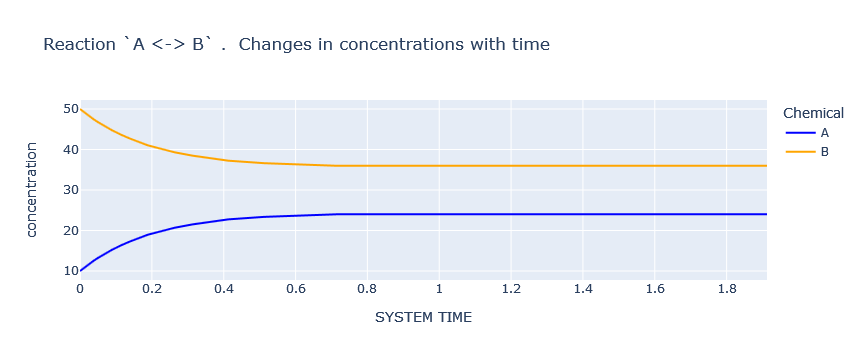

In [136]:
dynamics.plot_curves(colors=['blue', 'orange'])

## Note how the left-hand side of this plot is much smoother than it was in experiment `react_1`, where no adaptive time steps were used!

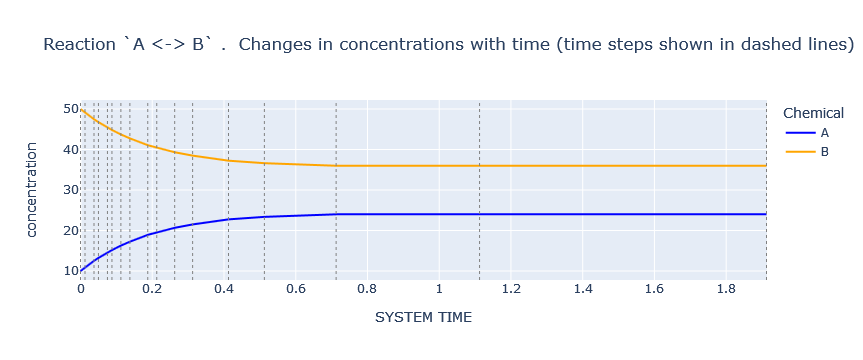

In [137]:
dynamics.plot_curves(colors=['blue', 'orange'], show_intervals=True)

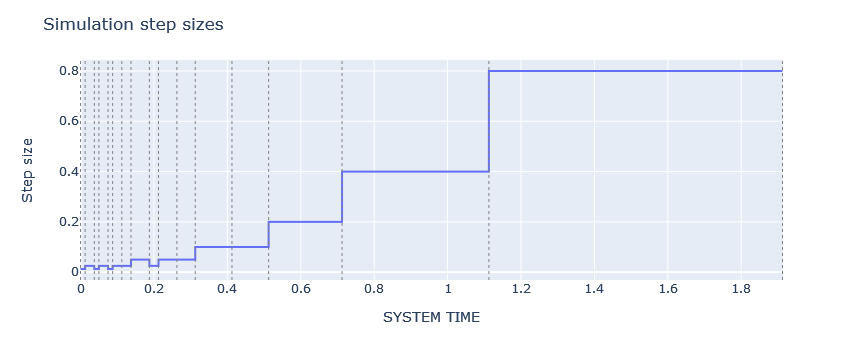

In [138]:
dynamics.plot_step_sizes(show_intervals=True)

# Diagnostics of the run may be investigated as follows:  
_(note - this is possible because we make a call to set_diagnostics() prior to running the simulation)_

In [30]:
dynamics.get_diagnostic_conc_data()

,TIME,A,B,primary_timestep,caption
0,0.0000,10.000000,50.000000,0.1000,
1,0.0125,10.875000,49.125000,0.1000,
2,0.0375,12.515625,47.484375,0.0250,
3,0.0500,13.233398,46.766602,0.0125,
4,0.0750,14.579224,45.420776,0.0250,
5,0.0875,15.168022,44.831978,0.0125,
6,0.1125,16.272019,43.727981,0.0250,
7,0.1375,17.238017,42.761983,0.0250,
8,0.1875,18.928513,41.071487,0.0500,
9,0.2125,19.562449,40.437551,0.0250,


In [31]:
dynamics.get_diagnostic_rxn_data(rxn_index=0)      # For the 0-th reaction (the only reaction in our case)

Reaction:  A <-> B


,TIME,Delta A,Delta B,reaction,delta_time,caption
0,0.0000,7.000000,-7.000000,0,0.1000,
1,0.0000,3.500000,-3.500000,0,0.0500,
2,0.0000,1.750000,-1.750000,0,0.0250,
3,0.0000,0.875000,-0.875000,0,0.0125,
4,0.0125,1.640625,-1.640625,0,0.0250,
5,0.0375,0.717773,-0.717773,0,0.0125,
6,0.0500,1.345825,-1.345825,0,0.0250,
7,0.0750,0.588799,-0.588799,0,0.0125,
8,0.0875,1.103997,-1.103997,0,0.0250,
9,0.1125,0.965998,-0.965998,0,0.0250,
